# ML SYSTEM DESIGN 2026. Теория.

# Введение

System Design - процесс проектирования архитектуры, компонентов, интерфейсов и данных для системы, удовлетворяющей заданным требованиям. Искусство принятия архитектурных решений с учетом ограничений и компромиссов.

Данный конспект представляет из себя краткую выжимку лекций, читавшихся в AI Masters, МГУ в осеннем семестре 2025 года. Курс читал Андрей Жуков https://adindex.ru/news/hr/2024/09/26/325927.phtml но оставил смешанные чувства: с одной стороны, видно, что авторы весьма компетентны в своей области, но с другой стороны, курс читался, видимо, экспромтом, а презентации генерировались в Гамме https://gamma.app/ru или чем-то подобном, так что периодически возникают моменты, не очень вяжущиеся с остальной структурой изложения, а некоторые слайды противоречат друг другу, или даже сами себе)

Поэтому информацию я переупорядочил, и внес дополнения, взятые из книг:

    Али Аминиан, Алекс Сюй. System Design. Машинное обучение. Подготовка к сложному интервью. (за рекомендацию спасибо https://t.me/ItsmeAnnnnnnnnny).
    
    Чип Хьюен. Проектирование систем машинного обучения (рекомендация Яндекса для подготовки к соответствующей секции собеседований).
    
    Yandex ML Handbook - во введении хорошо описано очень много концепций, к которым ссылаются в ML System Design https://education.yandex.ru/handbook/ml

Первая книга - абсолютная база, дающая полную схему разработки продукта, связанного с машинным обучением. Вторая уже дает более развернутые примеры к каждому шагу. Здесь эта схема приведена в расширенном виде.

Ну и поскольку реальная жизнь гораздо сложнее, данный конспект и курсы - лишь стартовая точка, с которой надо начинать погружение в решение конкретных проблем)

System Design - искусство компромиссов между целями и ограничениями 

    Безопасность и производительность
    
    Консистентность и доступность
    
    Надежность и стоимость
    
    итд и итп

# Схема ML System Design (Алекс Сюй)

I. Прояснение требований
    
        Функциональные требования - что система должна делать
        
        Нефункциональные - как система должна работать
    
        Ограничения (технические, бюджетные, временные)

II. Формулировка задачи Машинного Обучения

        Определение цели машинного обучения
    
        Определение входных и выходных данных 
    
        Категория машинного обучения (с учителем или без учителя; классификация или регрессия, и т д)
        
III. Инженерия данных 

        Сбор и хранение, очистка и валидация данных
    
        Конструирование признаков

IV. Разработка модели

        Выбор модели
    
        Обучение модели
    
V. Оценка (мониторинг)

        Качество данных
    
        Производительность модели
    
        Автономные метрики
    
        Оперативные метрики
    
VI. Развертка модели. Эксплуатация

        Инфраструктура (Вычислительные ресурсы, хранилища данных, API для интерфейса) 
    
        Мониторинг, обновление, масштабирование
        
        Версионирование и A/B тестирование/Итерации (улучшение и переобучение)
    
Бонус: человеческий фактор в МЛ

Итеративная разработка МЛ-системы: На каждом этапе может случиться инсайт, после которого надо начать этот этап заново, или вообще откатиться на предыдущий, или вернуться в начало разработки.

# Содержание

Прояснение требований (Алекс Сюй)

Лекция 1. ML-система. **II Формулировка задачи Машинного Обучения.** 

**System Design**

Лекция 2. Требования к системам. 

Лекция 3. Архитектурные паттерны. Распределение нагрузки. 

Лекция 4. Docker. Практика

---Первая часть лекций кончается здесь---

**ML Model**

Лекция 5. **III Инженерия данных.** 

Лекция 6. **IV. Разработка модели.**

Лекция 7. Практика

---Вторая часть лекций кончается здесь---

**VI. Эксплуатация**

Лекция 8. Деплоймент/развертка моделей. 

Лекция 9. Практика

Лекция 10. Практика

Лекция 11. Оптимизация Inference

Лекция 12. Практика

Лекция 13. Практика

Лекция 14. Практика ML в ecom

**Бонус: человеческий фактор в МЛ**

Лекция 15. Этика ИИ

## Прояснение требований

Вопросы при беседе с заказчиком или на собеседовании по проектированию систем МО обычно ставятся нечетко, с минимумом информации. Например, вопрос может звучать так: «Спроектируйте систему для рекомендации событий». Прежде всего стоит задать уточняющие вопросы. Но какие именно? Нужны такие вопросы, которые помогут понять конкретные требования. Этот систематизированный список вопросов можно взять за основу.

**Бизнес-цель.** Если система должна рекомендовать отпускное жилье для бронирования, то цели могут заключаться в том, чтобы увеличить количество бронирований и выручку.

**Функции, которые должна поддерживать система.** Какие из требуемых функциональных возможностей могут повлиять на проектирование системы МО? Допустим, вам предложено спроектировать систему для рекомендации видео. Вероятно, стоит уточнить, могут ли пользователи ставить рекомендуемому контенту лайки или дизлайки, потому что этими оценками можно размечать обучающие данные.

**Данные.** Откуда поступают данные? Каков размер датасета? Размечены ли данные?
Ограничения. Какая вычислительная мощность доступна? Будет ли система работать в облаке или на локальном устройстве? Планируется ли, что со временем модель будет автоматически совершенствоваться?

**Масштаб системы.** Сколько пользователей будет у системы? С каким количеством объектов (например, видеороликов) придется иметь дело? С какой скоростью растут эти показатели?
Производительность. Насколько быстрыми должны быть предсказания? Должна ли система работать в реальном времени? Что важнее — точность или низкая задержка?

Это не исчерпывающий список, но его можно принять за отправную точку. Не забывайте, что могут быть и другие важные аспекты — например, конфиденциальность и этика. Предполагается, что к концу этого этапа вы согласуете с экспертом рамки системы и требования к ней. Обычно имеет смысл составить список требований и ограничений: это поможет убедиться, что все одинаково представляют себе задачу.

#  Лекция 1. ML-система. Формулировка задачи Машинного Обучения.

Исследовательский и продуктовый МЛ

| Исследовательский: | Продуктовый:|
|--|--|
|Точно поставленная задача|Различные участники процесса предъявляют различные требования|
|Фокус на точность|Фокус на надежности и скорости|
|Чистые данные, Статичные датасеты|Грязные данные, Потоковые данные (постоянно меняются)|
|Эксперименты в тетрадках|Автоматизированный пайплайн|
|Решить задачу любой ценой|Объективность, интерпретируемость, этичность|

 МЛ-модель и МЛ-система

| МЛ-модель: | Мл-система:|
|--|--|
|алгоритм, обученный на данных для решения конкретной задачи|комплексная инфраструктура, включающая в себя модель, данные, код, мониторинг|

## ML-система

Комплексная система, включающая в себя какие-либо ML-алгоритмы

    ML-алгоритм
    
        Обученные модели
        
        Feature engineering
        
        Подготовка обучения (Preprocessing)

    Интерфейс/API
    
        Web/Mobile
        
        API Endpoints
        
        Dashboards
    
    Data Engineering/Data Stack
    
        Сбор данных 
        
        Хранилища данных
        
        Конвейеры данных
        
        Хранилища признаков
    
    Hardware
    
    Вычислительная структура
    
        Среда обучения
        
        Среда выполнения
        
        Мониторинг
        
    MLOPS
    
        Конвейеры развертывания
        
        Отслеживание экспериментов
        
        Хранилище моделей
        
        Среда для A/B тестирования

## Особенности МЛ-систем (Чип Хьюен)

    Данные являются неотъемлемой и во многом определяющей частью МЛ-системы. Их тоже надо тестировать, верифицировать. 
    
    Deep Learning: многие модели очень тяжеловесны, возникает вопрос о компромиссе между точностью и производительностью/доступными ресурсами.
    
    Мониторинг и отладка модели: в основе МЛ-модели часто лежат нетривиальные математические конструкции, работа которых недостаточно прозрачна.

## Роли в МЛ-проекте

Data Scientist: исследование данных, создание моделей, эксперименты

ML Engineer: разработка МЛ-инфраструктуры, deployment моделей

Data Engineer: построение data pipeline, ETL (Extract, Transform, Load) процессы

Dev(ML)Ops Engineer/Infrastructure team: инфраструктура, CI/CD (методология DevOps, автоматизирующая этапы сборки, тестирования и внедрения кода), мониторинг

Product Manager/Sales Team

High Management

разработчики, аналитики...

## Формулировка задачи Машинного Обучения.

### Определение цели машинного обучения

Первый вопрос при проектировании ML-системы: а нужен ли тут ML?
    
Алекс Сюй: Бизнес-цель может состоять в том, чтобы повысить продажи на 20 % или увеличить степень удержания пользователей. Однако цели не всегда определяются четко, а модель невозможно обучить, просто приказав ей увеличить продажи на 20 %. Чтобы система МО решила задачу, нужно преобразовать бизнес-цель в точно определенную цель МО. Хорошей целью МО будет такая, которую можно решить с помощью моделей МО. Пример: Видеостриминговое приложение - Бизнес: Повысить степень вовлеченности пользователей - ML: Максимизировать время, которое пользователи проводят за просмотром видео  

Чип Хьюен: 

    1. Система должна обладать способностью к обучению (мы надеемся, что по характеристикам квартиры можно предсказать цену)
    
    2. Сложные неочевидные паттерны (не имеет сиысла делать ML для броска костей, или очевидной линейной регрессии)
    
    3. Данные доступны и их можно собрать в достаточном количестве.
    
    4, 5. Цель - предсказание по неизвестным данным.
    
    Хорошие признаки для рассмотрения ML-системы:
    
        Повторяемость
        
        Низкая стоимость ошибки
        
        Масштабируемость задачи
        
        Паттерны постоянно меняются
    
    Ред флаги:
    
        Это неэтично (в книге вообще много внимания уделено этому вопросу)
        
        Это нерентабельно/существует более простое решение
        
### Определение входных и выходных данных 

Алекс Сюй:  Когда цель МО ясна, нужно определить входные и выходные данные системы. Например, для системы выявления вредоносного контента в социальной сети входными данными является пост, а выходными — решение о том, считать ли его вредоносным.

Иногда система может состоять более чем из одной модели МО. В таком случае требуется определить входные и выходные данные для каждой модели. Например, в примере с выявлением вредоносного контента одна модель может выявлять призыв к насилию, а другая — непристойные изображения. Система опирается на обе эти модели, чтобы решить, считать ли пост вредоносным.


### Категория машинного обучения (с учителем или без учителя; классификация или регрессия, и т д)

Ну это то, с чего начинается любой курс ML)

См. например Yandex ML Handbook https://education.yandex.ru/handbook/ml/article/mashinnoye-obucheniye

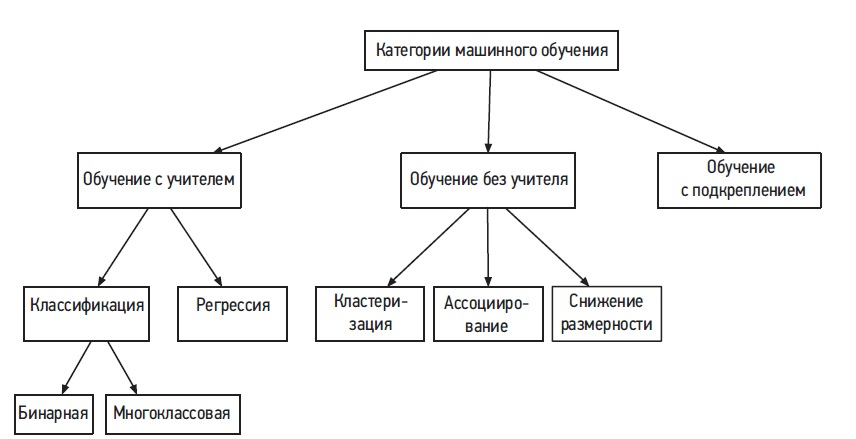

In [2]:
from IPython.display import Image
# Рисункок из книги Алекса Сюй
Image('L1_1.jpg', width=600, height=150 )

И еще сюда можно вписать различные задачи генерации! COMING SOON в другом курсе от AI Masters

#  Лекция 2. Требования к системам.

## Основные принципы проектирования систем.

Абстракция: скрытие деталей реализации. (скорее всего, при генерации презентации нейронка добавила что-то из ООП)

Модульность: разделение системы на небольшие управляемые модули (или слои), каждый из которых отвечает за свою часть логики. Требуется соблюдать баланс между размером компонент и их функциональностью.

Восстанавливаемость

Архитектурное проектирование (от High-level design до Low-level design, выбор технологий и паттернов)

Разработка и тестирование (итеративная разработка, Unit, integration, system тестирование, performance и security тестирование)

## Требования к системам

Список не исчерпывающий, но достаточно подробный

1. Надежность 2. отказоустойчивость 3. масштабируемость 4. поддерживаемость 5. адаптивность 6. доступность 7. производительность 8. безопасность.

**1. Надежность** - устойчивость к сбоям, способность системы работать корректно в течение определенного времени. Примеры стратегий обеспечения надежности: 1) Дублирование критических компонентов 2) Плавная деградация функциональности (если что-то отказало, снижаем доступные услуги) 3) Предотвращение каскадных отказов 4) Механизмы резервирования и перезапуска 5) разделение нагрузки.

    ML-системы могут выходить из строя тихо (из-за устаревания модели).

**2. Отказоустойчвость** - способность продолжать работу при отказе компонентов (желательно, корректно). Типы отказов: Аппаратные сбои, Программные ошибки, Человеческие ошибки, Внешние факторы (электропитание например).

**3. Масштабируемость** -  для оборудования вертикальная - апгрейд оборудования, горизонтальная - добавление дополнительного оборудования. При изменении обстоятельств также может потребоваться даунгрейд, или динамическое масштабирование ресурсов.

    При изменении и модификации МЛ-модели, требования к ресурсам также могут измениться.

**4. Поддерживаемость** - чистый код, тестирование, метрики, логи, алерты, документация, коммуникация между командами.

**5. Адаптивность** -  обновление на новых данных, тестирование изменений, управление функциональностью, возможность отката изменений.

**6. Доступность** - процент времени, когда система доступна для использования. SLA (Service Level Agreement) - процент времени, когда сервера доступны. Downtime calculation - непосредственный подсчет времени.
    
    CAP - теорема: невозможно обеспечить сразу три условия

        Consistency - все узлы видят одинаковые данные одновременно
        
        Availability - система остается операционной
    
        Partition tolerance - система продолжает работать при разделении сети

**7. Производительность** - оптимизация времени отклика, пропускной способности, рационального использования ресурсов.

Ключевые метрики:

    Latency: Время отклика на один запрос
    
    Throughput: количество обработанных запросов в единицу времени
    
    Responce time: время от отправки запроса до получения ответа

Факторы влияния на производительность:

    Сетевые задержки
    
    Время обработки в приложении
    
    Время доступа к базе данных
    
    Время сериализации/десериализации (процесс преобразования объекта (структуры данных в памяти) в формат, пригодный для хранения или передачи)
    
Оптимизация:

    Профилирование (анализ производительности приложения с целью выявления узких мест и оптимизации работы) и мониторинг (оценка скорости, стабильности и масштабируемости веб-приложения под различными нагрузками)
    
    Кеширование 
    
        Random, first/last in first out, least recently used, most recently used, least frequently used

        Внутренний кеш - в оперативной памяти, внешний - на стороннем сервере.

        Также существуют различные стратегии как записывать и обращаться к кешу.
    
    Оптимизация алгоритмов и структур данных
    
    Асинхронная обработка

    Разделение компонентов системы, сглаживание пиков нагрузки, обеспечение надежности доставки сообщений, масштабирование обработки задач и т д и т п

**8. Безопасность** - обеспечение конфиденциальности, целостности и доступности данных и функциональности.

Основные принципы: 

    Authentication: проверка подлинности пользователя
    
    Authorization: проверка прав доступа
    
    Encryption: шифрование данных в покое и передаче
    
    Ausit logging: ведение журнала безопасности
    
    Принцип минимальных привилегий - для предотвращения инцидентам даем пользователям только необходимые для работы с системой возможности.
    
Угрозы:

    Injection attacks - целенаправленные атаки
    
    DDoS
    
    Man-in-the-middle - крыса в организации

#  Лекция 3. Архитектурные паттерны, Распределение нагрузки

## Архитектурные паттерны

Проверенные решения типичных проблем. Архитектурные - масштабные.

Классификация:

    Структурные паттерны (как организовать компоненты)
    
    Поведенческие паттерны (как компоненты взаимодействуют)
    
    Паттерны развертывания (как размещать в инфраструктуре)

### 5 паттернов архитектуры

#### Паттерн 1. Монолитная архитектура

Единое приложение, один процесс, одна база данных. Все компоненты тесно связаны. Единая точка развертывания.

Преимущества: простота разработки на начальном этапе, легкое тестирование и отладка, простое развертывание, высокая производительность.

Недостатки: сложность масштабирования, технологическая привязка, сильная связность компонентость, сложность работы команд

Когда использовать: небольшие проекты, MVP

#### Паттерн 2. Микросервисная архитектура

Набор небольших независимих сервисов, каждый сервис имеет свою базу данных. Коммуникация между сервисами через API

Преимущества: масштабируемость, технологическое разнообразие, изоляция отказов, параллельная разработка

Недостатки: сложность коммуникации между командами и сервисами. Распределенные транзакции и консистентность. Мониторинг и отладка. Сетевые задержки. 

Когда использовать: Несколько команд, горизонтальное масштабирование  

#### Паттерн 3. Сервисно-ориентированная архитектура

Характеристики: Сервисы как бизнес-функции. Стандартизированные интерфейсы. Более крупные сервисы, чем в микросервисах. Централизованное управление, стандартизации.
    
Когда использовать: корпоративные системы. Интеграция legacy-систем. B2B

#### Паттерн 4. Event-driven архитектура

Характеристики: компоненты взаимодействуют через события. Асинхронная коммуникация. 

Преимущества: масштабируемость, отказоустойчивость, гибкость добавления функционалов

Недостаток: сложно отлаживать, растянутая консистентность, неочевидный порядок событий.

Когда использовать: срочность обработки событий, частые изменения бизнес-логики, интеграция разнородных ситем, отказоустойчивость и независимость компонент.

#### Паттерн 5. Layered архитектура

Принципы: каждый слой взаимодействует только с соседними. Разделение ответственности, возможность замены слоев.

Преимущества: разделение ответственности, модульность, расширяемость, повторное использование, параллельная разработка

Недостатки: снижение производительности, сложности масштабирования, сложности взаимодействия, меньшая гибкость

Когда использовать: в очень больших системах. Например, есть отдельный ML-слой.

## Распределение нагрузки

Распределение входиящих запросов между несколькими серверами для повышения производительности, надежности, масштабируемости.

Проблемы: единая точка отказа, неравномерная нагрузка на серверы.

OSI (Open Systems Interconnection) модель

Уровни модели:

1. Физический - кабели, радиоволны

2. Канальный - Ethernet, Wi-Fi

3. Сетевой - IP

4. Транспортный - TCP, UDP

5. Сеансовый - создание сеансов связи

6. Представления - форматы данных

7. Прикладной - интерфейс для взаимодействия

Типичная балансировка по OSI: 4 и 7

Алгоритмы распределения:

    Поочередное распределение запроса (возможно, с учетом веса)
    
    На наименее загруженный
    
    По хешу клиента
    
Расположение:

    физические устройства
    
    программные решения
    
    облачные решения

#  Лекция 4. Docker (см. Практику)

Виртуализация - изолированное искусственное окружение.

Контейниризация - Контейнеризация (виртуализация на уровне ОС) – технология, которая позволяет запускать программное обеспечение в изолированных на уровне операционной системы пространствах. 

Namespacing - изоляция ресурсов по процессам или группам процессов.

Cgroups (control groups) - лимитирование ресурсов, доступных процессам.

Виртуализация. Создаются независимые виртуальные операционные системы.

    Эффективно испольуем ресурсы
    
    Изоляция и безопасность
    
    НО! Расходы на виртуализацию

Поэтому придумали контейнеры. ЦПУ+память+диск+сеть через ядро системы работают в контейнере, в котором крутится приложение.